In [1]:
# used to extract results from logs and draw plots
import matplotlib.pyplot as plt
import numpy as np

# return: number of updates(1d), average results(1d), results(2d)
def extract_treechop(filename):
    avg_results=[] # 1d list
    results=[] # 2d list
    f=open(filename)
    odd=True
    with open(filename) as openfileobject:
        for line in openfileobject:
            if odd:
                for string in line.split():
                    try:
                        avg_results.append(float(string))
                    except ValueError:
                        pass
            else:
                results.append(eval(line))
            odd=not odd
            
    avg_results=np.array(avg_results)
    results=np.array(results)
    
    iterations=avg_results[0::2]
    avg_results=avg_results[1::2]
        
    return iterations,avg_results,results

def extract_obtain_diamond(filename):
    avg_results=[] # 1d list
    results=[] # 2d list
    progresses=[]
    f=open(filename)
    with open(filename) as openfileobject:
        for i,line in enumerate(openfileobject):
            if i%3==0:
                for string in line.split():
                    try:
                        avg_results.append(float(string))
                    except ValueError:
                        pass
            elif i%3==1:
                results.append(eval(line))
            else:
                progresses.append(eval(line))
            
    avg_results=np.array(avg_results)
    results=np.array(results)
    progresses=np.array(progresses)
    
    iterations=avg_results[0::2]
    avg_results=avg_results[1::2]
        
    return iterations,avg_results,results,progresses





In [2]:
def draw_curve(x,y,xname,yname,title):
    plt.figure()
    plt.plot(x,y)
    plt.xticks(x)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title)
    plt.savefig(title,dpi=300)
    plt.show()
    
def draw_bar(rewards,xname,yname,title): # only used for treechop
    intervals=[0]*8  
    # interval: [left,right)
    for reward in rewards:
        interval_nbr=int(reward//8)
        if interval_nbr==8:
            interval_nbr-=1 # the 8th interval includes 64, i.e. [56,64]
        intervals[interval_nbr]+=1
    interval_names=["[0,8)","[8,16)","[16,24)","[24,32)","[32,40)","[40,48)","[48,56)","[56,64]"]
    
    plt.figure()
    plt.bar(interval_names,intervals)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title)
    plt.savefig(title,dpi=300)
    plt.show()
    
def draw_progress_bar(progresses,xname,yname,title): # only used for obtain_diamond
#     progress_names=["log","planks","crafting_table","wooden_pickaxe",
#                     "cobblestone","stone_pickaxe","iron_ore","iron_pickaxe"]
    progress_names=np.arange(0,8)
    progress_counts=[np.count_nonzero(progresses >= i) for i in range(0,8)]
    
    #print(progress_counts[6])
    
    plt.figure()
    plt.bar(progress_names,progress_counts)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.yticks(np.arange(0,110,10))
    plt.title(title)
    plt.savefig(title,dpi=300)
    plt.show()
    
    print("log rate:",progress_counts[0]/100)
    print("stone rate:",progress_counts[4]/100)
    print("iron rate:",progress_counts[6]/100)


232.04749999999996


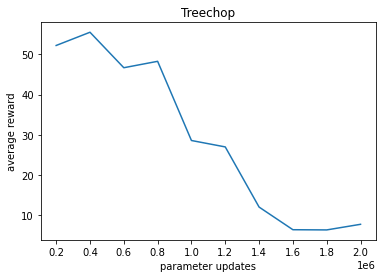

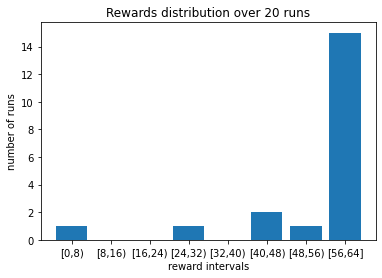

In [5]:
iterations,avg,r=extract_treechop("results/treechop_log_20220720.txt")
best_idx=np.argmax(avg)
best_rewards=r[best_idx]

print(np.var(best_rewards))

draw_curve(iterations,avg,"parameter updates","average reward","Treechop")
draw_bar(best_rewards,"reward intervals","number of runs","Rewards distribution over 20 runs")

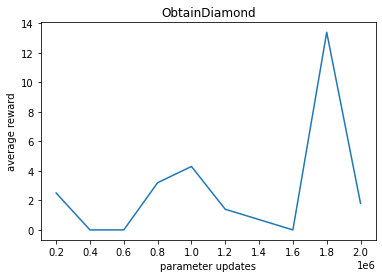

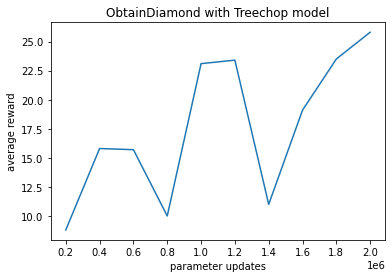

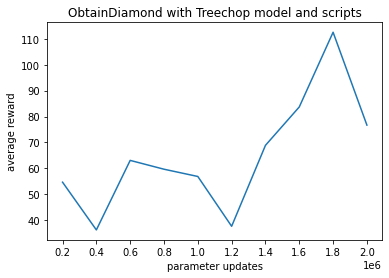

In [6]:
iterations,avg,r,p=extract_obtain_diamond("results/obtaindiamond_log_20220725.txt")
draw_curve(iterations,avg,"parameter updates","average reward","ObtainDiamond")

iterations,avg,r,p=extract_obtain_diamond("results/obtaindiamond_usetreechop_log_20220725.txt")
draw_curve(iterations,avg,"parameter updates","average reward","ObtainDiamond with Treechop model")

iterations,avg,r,p=extract_obtain_diamond("results/obtaindiamond_usetreechop_usescript_log_20220729.txt")
draw_curve(iterations,avg,"parameter updates","average reward","ObtainDiamond with Treechop model and scripts")

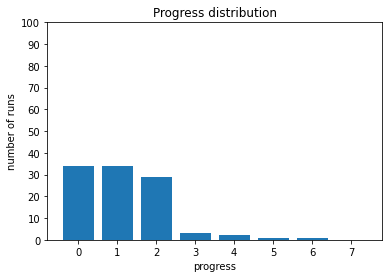

log rate: 0.34
stone rate: 0.02
iron rate: 0.01


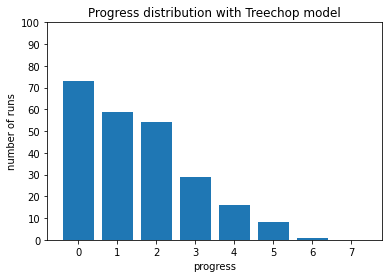

log rate: 0.73
stone rate: 0.16
iron rate: 0.01


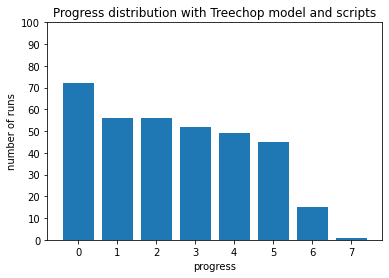

log rate: 0.72
stone rate: 0.49
iron rate: 0.15


In [7]:
iterations,avg,r,p=extract_obtain_diamond("results/obtaindiamond_1800000_100runs_log_20220726.txt")
draw_progress_bar(p,"progress","number of runs","Progress distribution")

iterations,avg,r,p=extract_obtain_diamond("results/obtaindiamond_usetreechop_2000000_100runs_log_20220727.txt")
draw_progress_bar(p,"progress","number of runs","Progress distribution with Treechop model")

iterations,avg,r,p=extract_obtain_diamond("results/obtaindiamond_usetreechop_usescript_1800000_100runs_log_20220730.txt")
draw_progress_bar(p,"progress","number of runs","Progress distribution with Treechop model and scripts")